# Analysis Sub-Agent with Daytona Code Execution

This notebook demonstrates the **analysis sub-agent** using Daytona's sandboxed code execution to:
1. Generate matplotlib plots and visualizations
2. Perform data analysis with pandas
3. Create complex multi-plot figures
4. Execute Python code safely in an isolated environment

The analysis sub-agent has access to:
- pandas, numpy, matplotlib, seaborn
- scipy, sklearn
- Safe file I/O in `/home/daytona/outputs/`

## Setup

Import the agent and check Daytona API key configuration.

In [1]:
import os
import sys
from dotenv import load_dotenv

# Add deep-agent to path (go up one directory since we're in experiments/)
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

# Load environment from deep-agent/.env (one level up)
load_dotenv(os.path.abspath(os.path.join(os.getcwd(), '..', '.env')))

# Import the execute_python_code function from the helper module
# (avoids loading the full agent which requires DATABASE_URL)
from daytona_helper import execute_python_code

# Verify Daytona API key
if os.getenv('DAYTONA_API_KEY'):
    print("✅ Daytona API key configured")
else:
    print("❌ DAYTONA_API_KEY not found in environment")
    print("   Add it to your .env file to use code execution")

✅ Daytona API key configured


## Example 1: Simple Line Plot

Generate a basic sine wave plot to verify the code execution works.

Output:
✅ Sine wave plot generated successfully!
📊 Plot saved to: sine_wave.png

Generated files: sine_wave.png


📥 Downloaded to local directory:

   • outputs/sine_wave.png

📊 Displaying plot:


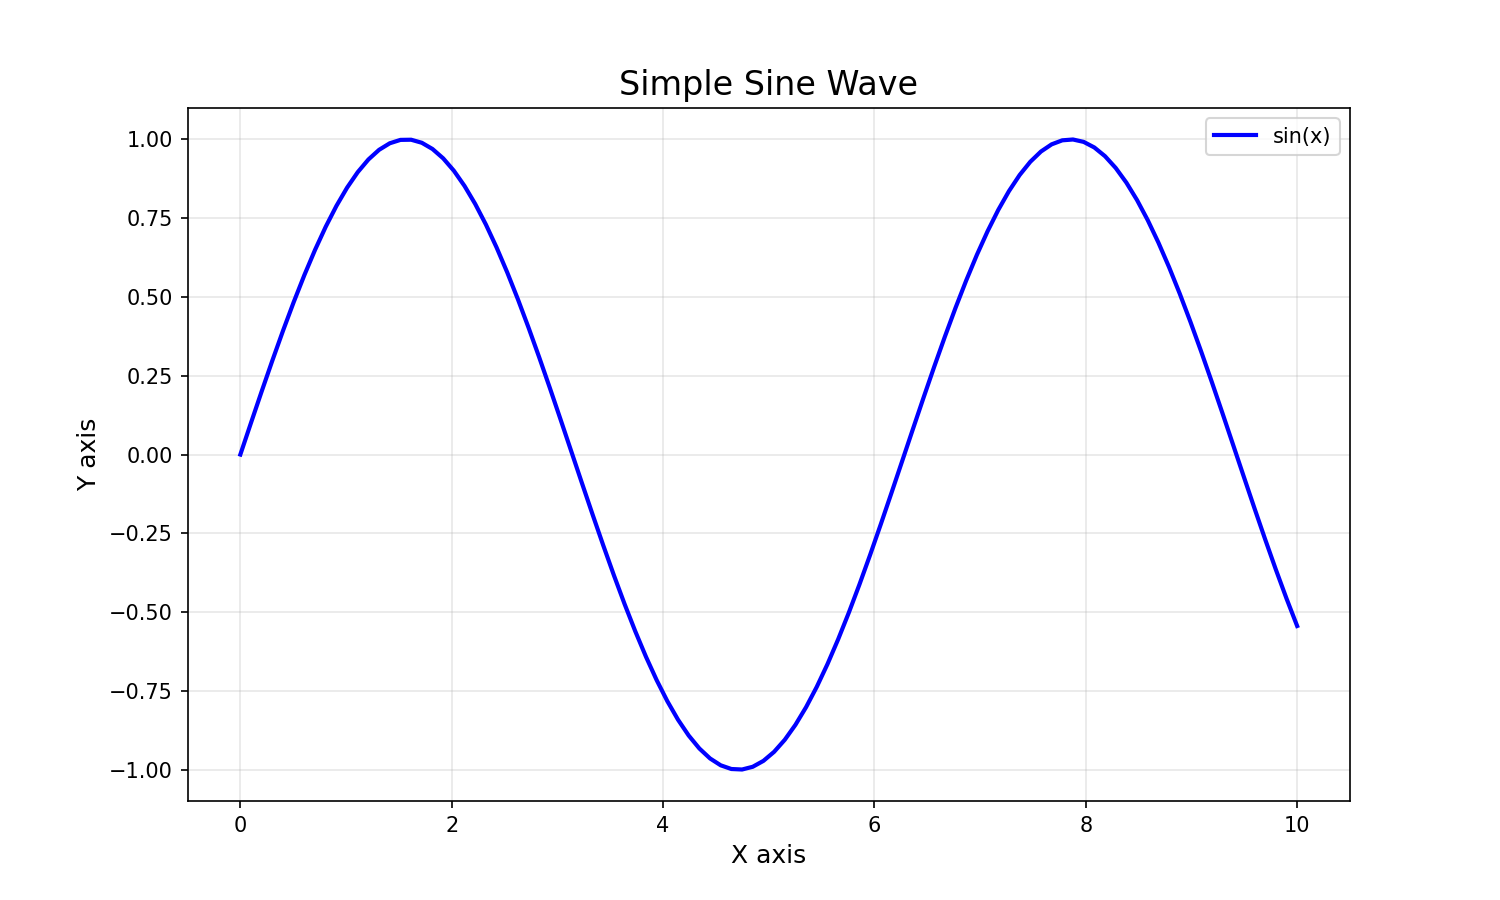

In [2]:
code = '''
import matplotlib.pyplot as plt
import numpy as np

# Generate data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='sin(x)')
plt.title('Simple Sine Wave', fontsize=16)
plt.xlabel('X axis', fontsize=12)
plt.ylabel('Y axis', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

# Save plot
plt.savefig('/home/daytona/outputs/sine_wave.png', dpi=150)
print("✅ Sine wave plot generated successfully!")
print("📊 Plot saved to: sine_wave.png")
'''

# Execute the code
result = execute_python_code(code)
print(result)

# Display the downloaded plot
from IPython.display import Image, display
if os.path.exists('outputs/sine_wave.png'):
    print("\n📊 Displaying plot:")
    display(Image('outputs/sine_wave.png'))

## Example 2: Data Analysis with Pandas

Analyze sample sales data and create visualizations.

Output:
<target_code>:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(df['Month'], rotation=45)
<target_code>:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(df['Month'], rotation=45)
<target_code>:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(df['Month'], rotation=45)

📊 BUSINESS PERFORMANCE SUMMARY (2024)

💰 Total Sales:        $     968,000
💸 Total Expenses:     $     552,000
✅ Total Profit:       $     416,000

📈 Average Monthly Sales:  $   80,666.67
📉 Average Monthly Expenses: $   46,000.00
💵 Average Monthly Profit:   $   34,666.67

🎯 Average Profit Margin:          41.88%

🏆 Best Month:      Dec ($62,000 profit)
⚠️  Worst Month:     Jan ($8,000 

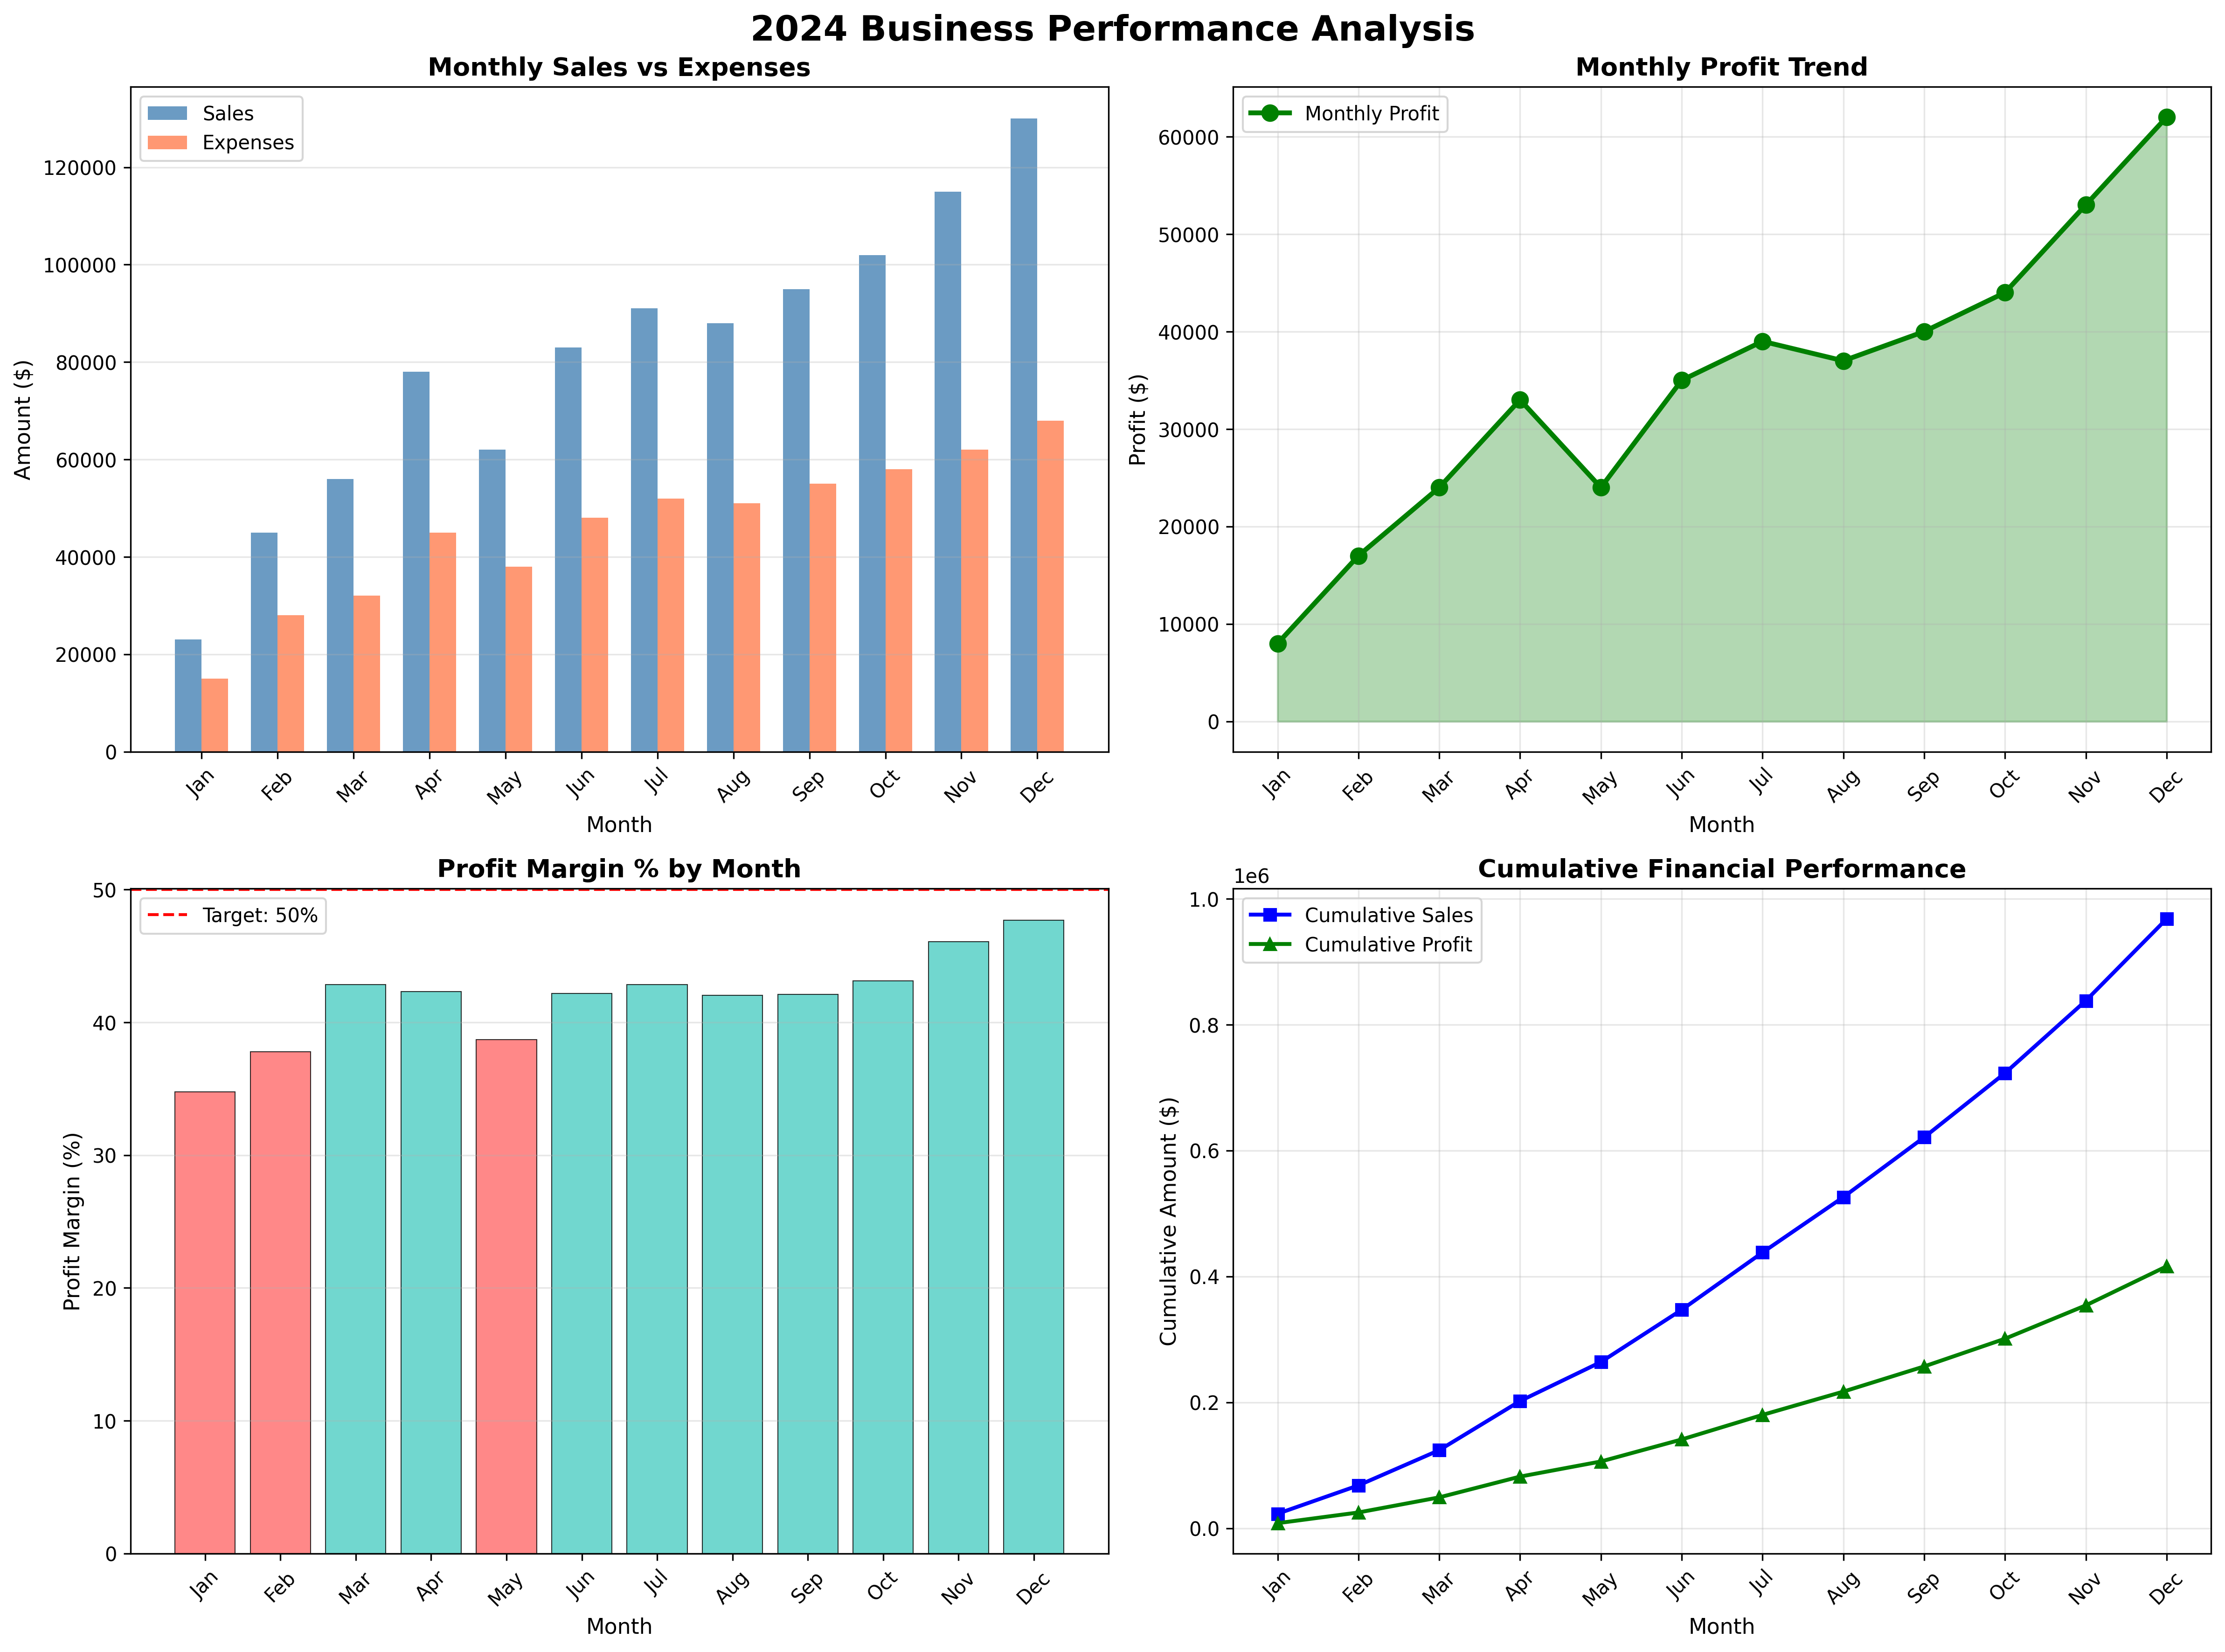

In [6]:
code = '''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create sample sales data
np.random.seed(42)
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'Sales': [23000, 45000, 56000, 78000, 62000, 83000, 91000, 88000, 95000, 102000, 115000, 130000],
    'Expenses': [15000, 28000, 32000, 45000, 38000, 48000, 52000, 51000, 55000, 58000, 62000, 68000]
}
df = pd.DataFrame(data)

# Calculate profit and growth
df['Profit'] = df['Sales'] - df['Expenses']
df['Profit_Margin_%'] = (df['Profit'] / df['Sales'] * 100).round(2)

# Create figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('2024 Business Performance Analysis', fontsize=18, fontweight='bold')

# Plot 1: Sales vs Expenses Bar Chart
x = np.arange(len(df['Month']))
width = 0.35
axes[0, 0].bar(x - width/2, df['Sales'], width, label='Sales', color='steelblue', alpha=0.8)
axes[0, 0].bar(x + width/2, df['Expenses'], width, label='Expenses', color='coral', alpha=0.8)
axes[0, 0].set_xlabel('Month', fontsize=11)
axes[0, 0].set_ylabel('Amount ($)', fontsize=11)
axes[0, 0].set_title('Monthly Sales vs Expenses', fontsize=13, fontweight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(df['Month'], rotation=45)
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Profit Trend Line
axes[0, 1].plot(df['Month'], df['Profit'], marker='o', linewidth=2.5, 
                markersize=8, color='green', label='Monthly Profit')
axes[0, 1].fill_between(range(len(df)), df['Profit'], alpha=0.3, color='green')
axes[0, 1].set_xlabel('Month', fontsize=11)
axes[0, 1].set_ylabel('Profit ($)', fontsize=11)
axes[0, 1].set_title('Monthly Profit Trend', fontsize=13, fontweight='bold')
axes[0, 1].set_xticklabels(df['Month'], rotation=45)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# Plot 3: Profit Margin Percentage
colors = ['#ff6b6b' if x < 40 else '#4ecdc4' if x < 50 else '#95e1d3' for x in df['Profit_Margin_%']]
axes[1, 0].bar(df['Month'], df['Profit_Margin_%'], color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
axes[1, 0].axhline(y=50, color='red', linestyle='--', linewidth=1.5, label='Target: 50%')
axes[1, 0].set_xlabel('Month', fontsize=11)
axes[1, 0].set_ylabel('Profit Margin (%)', fontsize=11)
axes[1, 0].set_title('Profit Margin % by Month', fontsize=13, fontweight='bold')
axes[1, 0].set_xticklabels(df['Month'], rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)
axes[1, 0].legend()

# Plot 4: Cumulative Revenue
df['Cumulative_Sales'] = df['Sales'].cumsum()
df['Cumulative_Profit'] = df['Profit'].cumsum()
axes[1, 1].plot(df['Month'], df['Cumulative_Sales'], marker='s', linewidth=2, 
                markersize=6, color='blue', label='Cumulative Sales')
axes[1, 1].plot(df['Month'], df['Cumulative_Profit'], marker='^', linewidth=2, 
                markersize=6, color='green', label='Cumulative Profit')
axes[1, 1].set_xlabel('Month', fontsize=11)
axes[1, 1].set_ylabel('Cumulative Amount ($)', fontsize=11)
axes[1, 1].set_title('Cumulative Financial Performance', fontsize=13, fontweight='bold')
axes[1, 1].set_xticklabels(df['Month'], rotation=45)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('/home/daytona/outputs/business_analysis.png', dpi=300, bbox_inches='tight')

# Print summary statistics
print("\\n" + "="*60)
print("📊 BUSINESS PERFORMANCE SUMMARY (2024)")
print("="*60)
print(f"\\n💰 Total Sales:        ${df['Sales'].sum():>12,}")
print(f"💸 Total Expenses:     ${df['Expenses'].sum():>12,}")
print(f"✅ Total Profit:       ${df['Profit'].sum():>12,}")
print(f"\\n📈 Average Monthly Sales:  ${df['Sales'].mean():>12,.2f}")
print(f"📉 Average Monthly Expenses: ${df['Expenses'].mean():>12,.2f}")
print(f"💵 Average Monthly Profit:   ${df['Profit'].mean():>12,.2f}")
print(f"\\n🎯 Average Profit Margin:    {df['Profit_Margin_%'].mean():>11.2f}%")
print(f"\\n🏆 Best Month:    {df.loc[df['Profit'].idxmax(), 'Month']:>5} (${df['Profit'].max():,} profit)")
print(f"⚠️  Worst Month:   {df.loc[df['Profit'].idxmin(), 'Month']:>5} (${df['Profit'].min():,} profit)")
print(f"\\n📊 Growth: Q1 → Q4 profit increased by ${df['Profit'].iloc[-1] - df['Profit'].iloc[0]:,}")
print("="*60)
print("\\n✅ Business analysis chart saved successfully!")
'''

# Execute the code
result = execute_python_code(code)
print(result)

# Display the downloaded plot
from IPython.display import Image, display
if os.path.exists('outputs/business_analysis.png'):
    print("\n📊 Displaying plot:")
    display(Image('outputs/business_analysis.png'))

## Example 3: Statistical Analysis with Distributions

Generate statistical plots including histograms, scatter plots, and distribution analysis.

In [10]:
code = '''
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data
normal_data = np.random.normal(100, 15, 1000)
uniform_data = np.random.uniform(50, 150, 1000)
x_scatter = np.random.randn(200)
y_scatter = 2 * x_scatter + np.random.randn(200) * 0.5

# Create figure
fig = plt.figure(figsize=(16, 10))
fig.suptitle('Statistical Analysis Dashboard', fontsize=18, fontweight='bold')

# Plot 1: Normal Distribution Histogram
ax1 = plt.subplot(2, 3, 1)
n, bins, patches = ax1.hist(normal_data, bins=40, color='skyblue', 
                             alpha=0.7, edgecolor='black', linewidth=0.5)
ax1.axvline(normal_data.mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {normal_data.mean():.2f}')
ax1.axvline(np.median(normal_data), color='green', linestyle='--', 
            linewidth=2, label=f'Median: {np.median(normal_data):.2f}')
ax1.set_xlabel('Value', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('Normal Distribution', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Uniform Distribution Histogram
ax2 = plt.subplot(2, 3, 2)
ax2.hist(uniform_data, bins=30, color='lightcoral', 
         alpha=0.7, edgecolor='black', linewidth=0.5)
ax2.axvline(uniform_data.mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {uniform_data.mean():.2f}')
ax2.set_xlabel('Value', fontsize=11)
ax2.set_ylabel('Frequency', fontsize=11)
ax2.set_title('Uniform Distribution', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Scatter Plot with Correlation
ax3 = plt.subplot(2, 3, 3)
correlation = np.corrcoef(x_scatter, y_scatter)[0, 1]
ax3.scatter(x_scatter, y_scatter, alpha=0.6, c='purple', 
            edgecolors='black', linewidth=0.5, s=50)
# Add regression line
z = np.polyfit(x_scatter, y_scatter, 1)
p = np.poly1d(z)
ax3.plot(x_scatter, p(x_scatter), "r--", linewidth=2, 
         label=f'y = {z[0]:.2f}x + {z[1]:.2f}')
ax3.set_xlabel('X values', fontsize=11)
ax3.set_ylabel('Y values', fontsize=11)
ax3.set_title(f'Scatter Plot (r={correlation:.3f})', fontsize=13, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Box Plot Comparison
ax4 = plt.subplot(2, 3, 4)
box_data = [normal_data, uniform_data]
bp = ax4.boxplot(box_data, labels=['Normal', 'Uniform'], 
                 patch_artist=True, notch=True)
for patch, color in zip(bp['boxes'], ['skyblue', 'lightcoral']):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax4.set_ylabel('Value', fontsize=11)
ax4.set_title('Distribution Comparison (Box Plot)', fontsize=13, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

# Plot 5: Cumulative Distribution Function (CDF)
ax5 = plt.subplot(2, 3, 5)
sorted_normal = np.sort(normal_data)
cdf_normal = np.arange(1, len(sorted_normal)+1) / len(sorted_normal)
ax5.plot(sorted_normal, cdf_normal, linewidth=2, color='blue', label='Normal')
sorted_uniform = np.sort(uniform_data)
cdf_uniform = np.arange(1, len(sorted_uniform)+1) / len(sorted_uniform)
ax5.plot(sorted_uniform, cdf_uniform, linewidth=2, color='red', label='Uniform')
ax5.set_xlabel('Value', fontsize=11)
ax5.set_ylabel('Cumulative Probability', fontsize=11)
ax5.set_title('Cumulative Distribution Function', fontsize=13, fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3)

# Plot 6: Q-Q Plot for normality test
ax6 = plt.subplot(2, 3, 6)
stats.probplot(normal_data, dist="norm", plot=ax6)
ax6.set_title('Q-Q Plot (Normal Distribution)', fontsize=13, fontweight='bold')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/home/daytona/outputs/statistical_analysis.png', dpi=300, bbox_inches='tight')

# Print statistical summary
print("\\n" + "="*60)
print("📊 STATISTICAL ANALYSIS SUMMARY")
print("="*60)

print("\\n📈 Normal Distribution:")
print(f"   Mean:     {normal_data.mean():.2f}")
print(f"   Median:   {np.median(normal_data):.2f}")
print(f"   Std Dev:  {normal_data.std():.2f}")
print(f"   Min:      {normal_data.min():.2f}")
print(f"   Max:      {normal_data.max():.2f}")

print("\\n📊 Uniform Distribution:")
print(f"   Mean:     {uniform_data.mean():.2f}")
print(f"   Median:   {np.median(uniform_data):.2f}")
print(f"   Std Dev:  {uniform_data.std():.2f}")
print(f"   Min:      {uniform_data.min():.2f}")
print(f"   Max:      {uniform_data.max():.2f}")

print("\\n🔗 Scatter Plot Analysis:")
print(f"   Correlation:  {correlation:.4f}")
print(f"   Slope:        {z[0]:.4f}")
print(f"   Intercept:    {z[1]:.4f}")

print("\\n" + "="*60)
print("✅ Statistical analysis complete! Dashboard saved.")
'''

result = execute_python_code(code)
print(result)

Output:
<target_code>:74: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax4.boxplot(box_data, labels=['Normal', 'Uniform'],

📊 STATISTICAL ANALYSIS SUMMARY

📈 Normal Distribution:
   Mean:     100.29
   Median:   100.38
   Std Dev:  14.68
   Min:      51.38
   Max:      157.79

📊 Uniform Distribution:
   Mean:     100.36
   Median:   101.61
   Std Dev:  28.82
   Min:      50.32
   Max:      149.94

🔗 Scatter Plot Analysis:
   Correlation:  0.9716
   Slope:        1.9917
   Intercept:    -0.0173

✅ Statistical analysis complete! Dashboard saved.

Generated files: statistical_analysis.png


📥 Downloaded to local directory:

   • outputs/statistical_analysis.png


## Example 4: Time Series Analysis

Analyze time series data with trends, seasonality, and forecasting visualization.

In [8]:
code = '''
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Generate synthetic time series data
np.random.seed(42)
days = 365
date_range = pd.date_range(start='2024-01-01', periods=days, freq='D')

# Create components: trend + seasonality + noise
trend = np.linspace(100, 200, days)
seasonality = 30 * np.sin(2 * np.pi * np.arange(days) / 365 * 4)  # Quarterly pattern
noise = np.random.normal(0, 5, days)
time_series = trend + seasonality + noise

# Create DataFrame
df = pd.DataFrame({
    'date': date_range,
    'value': time_series,
    'trend': trend,
    'seasonality': seasonality
})

# Calculate rolling statistics
df['rolling_mean_7'] = df['value'].rolling(window=7).mean()
df['rolling_mean_30'] = df['value'].rolling(window=30).mean()
df['rolling_std_30'] = df['value'].rolling(window=30).std()

# Create comprehensive time series plot
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
fig.suptitle('Time Series Analysis - 2024 Daily Metrics', fontsize=18, fontweight='bold')

# Plot 1: Original time series with rolling averages
axes[0].plot(df['date'], df['value'], linewidth=1, alpha=0.5, 
             color='lightgray', label='Daily Values')
axes[0].plot(df['date'], df['rolling_mean_7'], linewidth=2, 
             color='blue', label='7-Day Moving Average')
axes[0].plot(df['date'], df['rolling_mean_30'], linewidth=2.5, 
             color='red', label='30-Day Moving Average')
axes[0].fill_between(df['date'], 
                      df['rolling_mean_30'] - df['rolling_std_30'],
                      df['rolling_mean_30'] + df['rolling_std_30'],
                      alpha=0.2, color='red', label='±1 Std Dev (30-day)')
axes[0].set_ylabel('Value', fontsize=12)
axes[0].set_title('Time Series with Moving Averages', fontsize=14, fontweight='bold')
axes[0].legend(loc='upper left', fontsize=10)
axes[0].grid(True, alpha=0.3)

# Plot 2: Decomposition - Trend
axes[1].plot(df['date'], df['value'], linewidth=1, alpha=0.3, 
             color='gray', label='Original')
axes[1].plot(df['date'], df['trend'], linewidth=3, 
             color='green', label='Trend Component', linestyle='--')
axes[1].set_ylabel('Value', fontsize=12)
axes[1].set_title('Trend Component Extraction', fontsize=14, fontweight='bold')
axes[1].legend(loc='upper left', fontsize=10)
axes[1].grid(True, alpha=0.3)

# Plot 3: Seasonal Component
axes[2].plot(df['date'], df['seasonality'], linewidth=2, 
             color='purple', label='Seasonal Component')
axes[2].axhline(y=0, color='black', linestyle='-', linewidth=0.8, alpha=0.5)
axes[2].fill_between(df['date'], 0, df['seasonality'], 
                      where=(df['seasonality'] > 0), alpha=0.3, 
                      color='green', label='Positive')
axes[2].fill_between(df['date'], 0, df['seasonality'], 
                      where=(df['seasonality'] <= 0), alpha=0.3, 
                      color='red', label='Negative')
axes[2].set_xlabel('Date', fontsize=12)
axes[2].set_ylabel('Seasonal Effect', fontsize=12)
axes[2].set_title('Seasonal Component (Quarterly Pattern)', fontsize=14, fontweight='bold')
axes[2].legend(loc='upper left', fontsize=10)
axes[2].grid(True, alpha=0.3)

# Format x-axis for all plots
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('/home/daytona/outputs/time_series_analysis.png', dpi=300, bbox_inches='tight')

# Calculate and print statistics
print("\\n" + "="*70)
print("📈 TIME SERIES ANALYSIS SUMMARY")
print("="*70)

print(f"\\n📅 Date Range: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")
print(f"📊 Total Observations: {len(df)}")

print("\\n📊 Overall Statistics:")
print(f"   Mean:        {df['value'].mean():.2f}")
print(f"   Median:      {df['value'].median():.2f}")
print(f"   Std Dev:     {df['value'].std():.2f}")
print(f"   Min:         {df['value'].min():.2f}")
print(f"   Max:         {df['value'].max():.2f}")

# Calculate quarterly averages
df['quarter'] = df['date'].dt.quarter
quarterly_stats = df.groupby('quarter')['value'].agg(['mean', 'std'])

print("\\n📅 Quarterly Performance:")
for q in range(1, 5):
    if q in quarterly_stats.index:
        print(f"   Q{q}: Mean = {quarterly_stats.loc[q, 'mean']:.2f}, "
              f"Std Dev = {quarterly_stats.loc[q, 'std']:.2f}")

# Trend analysis
start_value = df['value'].iloc[:30].mean()
end_value = df['value'].iloc[-30:].mean()
change = ((end_value - start_value) / start_value) * 100

print("\\n📈 Trend Analysis:")
print(f"   Starting Average (first 30 days):  {start_value:.2f}")
print(f"   Ending Average (last 30 days):     {end_value:.2f}")
print(f"   Overall Change:                     {change:+.2f}%")

print("\\n" + "="*70)
print("✅ Time series analysis complete! Chart saved.")
'''

result = execute_python_code(code)
print(result)

Output:

📈 TIME SERIES ANALYSIS SUMMARY

📅 Date Range: 2024-01-01 to 2024-12-30
📊 Total Observations: 365

📊 Overall Statistics:
   Mean:        150.05
   Median:      149.46
   Std Dev:     33.06
   Min:         79.40
   Max:         215.79

📅 Quarterly Performance:
   Q1: Mean = 111.88, Std Dev = 16.03
   Q2: Mean = 137.62, Std Dev = 16.99
   Q3: Mean = 162.52, Std Dev = 17.77
   Q4: Mean = 188.04, Std Dev = 17.52

📈 Trend Analysis:
   Starting Average (first 30 days):  124.01
   Ending Average (last 30 days):     173.73
   Overall Change:                     +40.09%

✅ Time series analysis complete! Chart saved.

Generated files: time_series_analysis.png


📥 Downloaded to local directory:

   • outputs/time_series_analysis.png


## Example 5: Custom Analysis

Use this cell to write your own custom analysis code. The `execute_python_code` function provides:
- Pre-imported: pandas, numpy, matplotlib, seaborn
- Output directory: `/home/daytona/outputs/`
- Isolated sandbox environment (safe execution)

In [9]:
# Write your custom analysis here
custom_code = '''
import matplotlib.pyplot as plt
import numpy as np

# Your code here
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.figure(figsize=(12, 6))
plt.plot(x, y1, label='sin(x)', linewidth=2)
plt.plot(x, y2, label='cos(x)', linewidth=2)
plt.title('Custom Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/daytona/outputs/custom_plot.png', dpi=150)

print("✅ Custom plot generated!")
'''

result = execute_python_code(custom_code)
print(result)

Output:
✅ Custom plot generated!

Generated files: custom_plot.png


📥 Downloaded to local directory:

   • outputs/custom_plot.png


## Notes

### How It Works

1. **Daytona Sandbox**: Each code execution runs in an isolated Docker container
2. **Pre-installed Libraries**: Common data science libraries are available
3. **File Output**: Save plots to `/home/daytona/outputs/` and they'll be tracked
4. **Automatic Cleanup**: Sandboxes are deleted after execution

### Tips for Using the Analysis Agent

- **Save plots** using `plt.savefig('/home/daytona/outputs/filename.png')`
- **Print results** to see them in the output
- **Use high DPI** (300) for publication-quality plots
- **Handle errors gracefully** - the sandbox isolates failures

### Comparing to test_daytona_manual.py

The `test_daytona_manual.py` script:
- Runs automated tests to verify Daytona integration
- Tests multiple plot types in sequence
- Validates file generation and output

This notebook:
- Interactive exploration and demonstration
- Shows how to use the analysis sub-agent directly
- Provides reusable examples for your own analysis

### Running the test_daytona_manual.py Script

From the terminal:
```bash
python test_daytona_manual.py
```

This will run 3 automated tests to verify the Daytona integration works correctly.